In [58]:
import random as rnd
import plotly.express as px
import pandas as pd
import numpy as np
import time
import plotly.graph_objects as go

In [59]:
class Sector:
    colinising = 0.3253
    size = 200
    types=["empty","spacefaring","non_spacefaring"]
    @classmethod
    def id(cls,x,y,z):
        return  x+(y*Sector.size)+(z*Sector.size*Sector.size)
    
    @classmethod
    def cordinates(cls,id):
        z = id // (Sector.size*Sector.size)
        y = (id-z*Sector.size*Sector.size) // Sector.size
        x = id-z*Sector.size*Sector.size-y*Sector.size
        return x,y,z

    def __init__(self,x,y,z,space) -> None:
        def add_neighbour(i,x,y,z,space,neighbours):
            dx=[-1,1,0,0,0,0]
            dy=[0,0,-1,1,0,0]
            dz=[0,0,0,0,-1,1]
            id = Sector.id(x+dx[i],y+dy[i],z+dz[i])
            if id not in space:
                neighbours.append(id)

        self.id = Sector.id(x,y,z)
        self.x = x+ 0.5-rnd.random()
        self.y = y+ 0.5-rnd.random()
        self.z = z+ 0.5-rnd.random()
        self.colonized=0
        self.neighbours = []
        self.linked_to = []
        for i in range(6):
            add_neighbour(i,x,y,z,space,self.neighbours) 
        space[self.id] =self
    
    def get_cords(self):
        return[self.x,self.y,self.z,Sector.types[self.colonized]]

    def colonize(self,space):
        if self.colonized==1 and  len(self.neighbours)>0:
            while (sector := rnd.choice(self.neighbours)) in space and len(self.neighbours)>0:
                self.neighbours.remove(sector)
                if len(self.neighbours)==0:
                    return False
            
            x,y,z = Sector.cordinates(sector)
            new_sector = Sector(x,y,z,space)
            if rnd.random()<Sector.colinising:
                new_sector.colonized=1
            else:
                new_sector.colonized=2
            self.neighbours.remove(sector)
            return new_sector
        else:
             return False


In [60]:
st = time.time()
seed = rnd.randrange(1000000)
seed=223514
Sector.colinising = 0.32
Sector.size = 500
rnd.seed(seed)
space={}
cols=[]
s = Sector(250,250,250,space)
s.colonized = 1
cols.append(s)
growth=[]
for t in range(800):
    h=[]
    for c in cols:
        if(n:=c.colonize(space)):
            h.append(n)
    cols.extend(h)
    growth.append([t,len(cols)])
star_map=[]
for c in cols:
    star_map.append(c.get_cords())
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')
print("Stars",len(star_map))



Execution time: 39.04557466506958 seconds
Stars 1086776


In [61]:
# df = pd.DataFrame(star_map, columns=['x','y','z','colony_type'])

# fig = px.scatter_3d(df, x='x', y='y', z='z', color='colony_type',color_discrete_sequence=["maroon", "goldenrod","green"] ,title="Star map", width=800, height=800)
# fig.update_traces(hoverinfo="skip",marker_size =1)
   
# fig.update_layout(scene=dict(xaxis_showspikes=False,
#                              yaxis_showspikes=False,
#                              zaxis_showspikes=False,
#                              xaxis = dict(nticks=10, range=[df["x"].min(),df["x"].max()]),
#                              yaxis = dict(nticks=10, range=[df["y"].min(),df["y"].max()]),
#                              zaxis = dict(nticks=10, range=[df["z"].min(),df["z"].max()]),
#                              ))


In [62]:
print("Seed was:", seed)

Seed was: 223514


In [63]:
print('Execution time:', elapsed_time, 'seconds')
print("Stars",len(star_map))

Execution time: 39.04557466506958 seconds
Stars 1086776


In [64]:
800*1000

800000

In [65]:
gdf = pd.DataFrame(list(growth, columns=['time','colinies'])

In [66]:
fig = go.Figure(data=go.Scatter(
        x=gdf.index,
        y=gdf["colinies"],
        mode='markers',
    ))
fig.update_yaxes(type="log")
fig.show()

In [67]:
df.head()

,time,colinies
0,0,2
1,1,4
2,2,7
3,3,12
4,4,18


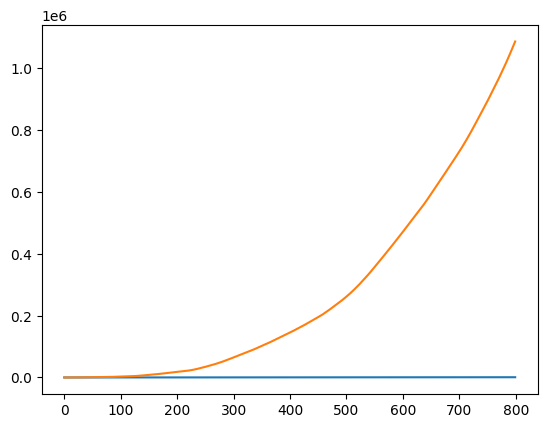

In [68]:
import matplotlib.pyplot as plt
plt.plot(growth)